<a href="https://colab.research.google.com/github/Kativic/Kativic-/blob/main/Mini_Case_Pyspark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto: JumpStart

Curso: Bootcamp Analista de Dados

Data de entrega: 03 de Agosto de 2024

Professor: Lucas

Alunos: Katia Santos

## **Solicitação**


Vocês devem escolher uma questão do case pandas, refazer utilizando pyspark e fazer as seguintes análises:


1.   Qual ferramenta foi mais performática?
2.   Existiu diferença de performance entre spark.sql e pyspark puro?
3.   É possível otimizar os arquivos? Utilizando outro formato, criando particionamento e etc.
4.  Faça uma pesquisa sobre particionamento no pyspark e como isso pode impactar na performance para análise de bigdata.


Fiquem à vontade para explorar a criatividade, utilizar arquivos maiores do imdb e testar se o pyspark viabiliza o uso.

 ## **Instalação de bibliotecas e importação de módulos**

In [ ]:
%pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488490 sha256=832dbb9bbc9d45bf9450d9c817abb6a5e28463b7117a029588bf13cc20067152
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.types import IntegerType,FloatType,DoubleType

In [ ]:
spark = SparkSession.builder.appName('Spark').getOrCreate()

## **Extração via PySpark**

In [ ]:
# Inicializar Spark
spark = SparkSession.builder.appName("IMDb Analysis").getOrCreate()

# Carregar title.basics.tsv.gz
title_basics = spark.read.option("header", "true").option("sep", "\t").csv("/content/title.basics.tsv")

# Carregar title.ratings.tsv.gz
title_ratings = spark.read.option("header", "true").option("sep", "\t").csv("/content/title.ratings.tsv")

# Exibir esquemas
title_basics.printSchema()
title_ratings.printSchema()


root
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- endYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)

root
 |-- tconst: string (nullable = true)
 |-- averageRating: string (nullable = true)
 |-- numVotes: string (nullable = true)



## **Pré-Análise via PySpark**

In [ ]:
# Mostrar o DataFrame
df.show(5)

+---+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+---------------+----------+---------------+----------+
|_c0|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|endYear|runtimeMinutes|              genres|averageRating_x|numVotes_x|averageRating_y|numVotes_y|
+---+---------+---------+--------------------+--------------------+-------+---------+-------+--------------+--------------------+---------------+----------+---------------+----------+
|  0|tt0000009|    movie|          Miss Jerry|          Miss Jerry|      0|     1894|     \N|            45|             Romance|            5.4|     212.0|            5.4|     212.0|
|  1|tt0000147|    movie|The Corbett-Fitzs...|The Corbett-Fitzs...|      0|     1897|     \N|           100|Documentary,News,...|            5.2|     517.0|            5.2|     517.0|
|  3|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     

In [ ]:
# Excluir a coluna "endYear"
df = df.drop("endYear", 'averageRating_x','numVotes_x')

df.show(5)

+---+---------+---------+--------------------+--------------------+-------+---------+--------------+--------------------+---------------+----------+
|_c0|   tconst|titleType|        primaryTitle|       originalTitle|isAdult|startYear|runtimeMinutes|              genres|averageRating_y|numVotes_y|
+---+---------+---------+--------------------+--------------------+-------+---------+--------------+--------------------+---------------+----------+
|  0|tt0000009|    movie|          Miss Jerry|          Miss Jerry|      0|     1894|            45|             Romance|            5.4|     212.0|
|  1|tt0000147|    movie|The Corbett-Fitzs...|The Corbett-Fitzs...|      0|     1897|           100|Documentary,News,...|            5.2|     517.0|
|  3|tt0000574|    movie|The Story of the ...|The Story of the ...|      0|     1906|            70|Action,Adventure,...|            6.0|     914.0|
|  4|tt0000591|    movie|    The Prodigal Son|   L'enfant prodigue|      0|     1907|            90|      

In [ ]:
# Visualisando os tipos da variáveis
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: string (nullable = true)
 |-- startYear: string (nullable = true)
 |-- runtimeMinutes: string (nullable = true)
 |-- genres: string (nullable = true)
 |-- averageRating_y: string (nullable = true)
 |-- numVotes_y: string (nullable = true)



In [ ]:
# Mudando para numéricos as colunas abaixo:
df = df.withColumn('isAdult', F.col('isAdult').cast(IntegerType()))\
       .withColumn('startYear', F.col('startYear').cast(IntegerType()))\
       .withColumn('runtimeMinutes', F.col('runtimeMinutes').cast(FloatType()))\
       .withColumn('averageRating_y', F.col('averageRating_y').cast(FloatType()))\
       .withColumn('numVotes_y', F.col('numVotes_y').cast(FloatType()))

In [ ]:
# Visualisando os tipos da variáveis
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- tconst: string (nullable = true)
 |-- titleType: string (nullable = true)
 |-- primaryTitle: string (nullable = true)
 |-- originalTitle: string (nullable = true)
 |-- isAdult: integer (nullable = true)
 |-- startYear: integer (nullable = true)
 |-- runtimeMinutes: float (nullable = true)
 |-- genres: string (nullable = true)
 |-- averageRating_y: float (nullable = true)
 |-- numVotes_y: float (nullable = true)



## **Analise de Perfomance**



*   **Refazer questão do Pandas utilizando Pyspark**


 **Questão escolhida:** Qual o filme com maior tempo de duração? Calcule os percentis considerando o tempo de duração.











In [ ]:
import pandas as pd
import time

# Carregar o arquivo CSV usando Pandas
start_time = time.time()
df_pandas = pd.read_csv("/content/imdb_arquivo.csv", delimiter='\t')

# Selecionar apenas as colunas desejadas
df_pandas = df_pandas[['tconst', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres']]

# Encontrar o filme com maior tempo de duração
filme_maior_tempo = df_pandas.loc[df_pandas['runtimeMinutes'].idxmax()]

# Tempo de execução com Pandas
tempo_execucao_pandas = time.time() - start_time

# Criar DataFrame com o filme de maior duração e o tempo de execução
df_resultado = pd.DataFrame([filme_maior_tempo])
df_resultado['Tempo_Execucao_Com_Pandas'] = round(tempo_execucao_pandas, 2)

# Exibir o DataFrame em formato de tabela
print(df_resultado.to_markdown(index=False))


| tconst     |   originalTitle |   startYear |   runtimeMinutes | genres    |   Tempo_Execucao_Com_Pandas |
|:-----------|----------------:|------------:|-----------------:|:----------|----------------------------:|
| tt29302558 |             100 |        2019 |            59460 | Animation |                         1.6 |


In [ ]:
# Calcular os percentis do tempo de duração
percentis = df_pandas['runtimeMinutes'].quantile([0.25, 0.5, 0.75])
print(f"Percentis do tempo de duração:\n{percentis}")

Percentis do tempo de duração:
0.25     77.0
0.50     90.0
0.75    100.0
Name: runtimeMinutes, dtype: float64


In [ ]:
import time
import numpy as np
from pyspark.sql.functions import col

# Carregar o arquivo CSV com o delimitador de tabulação
start_time = time.time()
df_spark = spark.read.option("delimiter", "\t").csv("/content/imdb_arquivo.csv", header=True, inferSchema=True)

# Selecionar apenas as colunas desejadas
df_spark = df_spark.select('tconst', 'originalTitle', 'startYear', 'runtimeMinutes', 'genres')

# Encontrar o filme com maior tempo de duração
filme_maior_tempo = df_spark.orderBy(col("runtimeMinutes").desc()).first()

# Tempo de execução com PySpark
tempo_execucao_pyspark = time.time() - start_time

# Resultados
print(f"Filme com maior tempo de duração:\n{filme_maior_tempo}")
print(f"Tempo de execução com PySpark: {round(tempo_execucao_pyspark, 2)} segundos")

Filme com maior tempo de duração:
Row(tconst='tt29302558', originalTitle='100', startYear=2019, runtimeMinutes=59460, genres='Animation')
Tempo de execução com PySpark: 5.33 segundos


In [ ]:
# Calcular os percentis do tempo de duração
runtime_minutes = df_spark.select("runtimeMinutes").rdd.flatMap(lambda x: x).collect()
percentis = np.percentile(runtime_minutes, [25, 50, 75])
print(f"Percentis do tempo de duração:\n{percentis}")

Percentis do tempo de duração:
[ 74.  89. 100.]


* **Comparação de Perfomance - Usando spark.sql**

In [ ]:
# Criar Views Temporárias
title_basics.createOrReplaceTempView("title_basics")
title_ratings.createOrReplaceTempView("title_ratings")

# Consulta SQL
import time
start_time = time.time()
result_sql = spark.sql("""
SELECT tb.primaryTitle, tr.averageRating
FROM title_basics tb
JOIN title_ratings tr ON tb.tconst = tr.tconst
WHERE tb.startYear >= 2000
ORDER BY tr.averageRating DESC
LIMIT 10
""")
result_sql.show()
end_time = time.time()
print(f"Tempo de execução (spark.sql): {end_time - start_time} segundos")

+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|             A Lucia|          9.9|
|       Cynthia Nixon|          9.9|
|          Emma Samms|          9.9|
|          Bea Arthur|          9.9|
|       The Whirlpool|          9.9|
|         Sheryl Crow|          9.9|
|     Rosie O'Donnell|          9.9|
|     Toss My Salad 4|          9.9|
|   The Hitter Awards|          9.9|
|Making of Sash! W...|          9.9|
+--------------------+-------------+

Tempo de execução (spark.sql): 8.585661888122559 segundos


* **Usando Apenas Pyspark**

In [ ]:
# Consulta PySpark Puro
start_time = time.time()
result_pyspark = title_basics.join(title_ratings, title_basics.tconst == title_ratings.tconst) \
    .filter(title_basics.startYear >= 2000) \
    .select("primaryTitle", "averageRating") \
    .orderBy("averageRating", ascending=False) \
    .limit(10)
result_pyspark.show()
end_time = time.time()
print(f"Tempo de execução (PySpark puro): {end_time - start_time} segundos")


+--------------------+-------------+
|        primaryTitle|averageRating|
+--------------------+-------------+
|             A Lucia|          9.9|
|       Cynthia Nixon|          9.9|
|          Emma Samms|          9.9|
|          Bea Arthur|          9.9|
|       The Whirlpool|          9.9|
|         Sheryl Crow|          9.9|
|     Rosie O'Donnell|          9.9|
|     Toss My Salad 4|          9.9|
|   The Hitter Awards|          9.9|
|Making of Sash! W...|          9.9|
+--------------------+-------------+

Tempo de execução (PySpark puro): 7.884453773498535 segundos


## **Otimazação dos Arquivos**

In [ ]:
# Salvar em Parquet
title_basics.write.parquet("path/to/title_basics.parquet")
title_ratings.write.parquet("path/to/title_ratings.parquet")

# Carregar dados em Parquet
title_basics_parquet = spark.read.parquet("path/to/title_basics.parquet")
title_ratings_parquet = spark.read.parquet("path/to/title_ratings.parquet")


In [ ]:
# Particionar os dados por ano de início
title_basics.write.partitionBy("startYear").parquet("path/to/partitioned/title_basics.parquet")


## **Explorando Arquivos Maiores**

In [ ]:
spark = SparkSession.builder.appName("IMDb Analysis").getOrCreate()

# Carregar title.principals.tsv.gz
title_principals = spark.read.option("header", "true").option("sep", "\t").csv("/content/drive/MyDrive/IMDB/title.principals.tsv")

# Exibir esquema
title_principals.printSchema()


root
 |-- tconst: string (nullable = true)
 |-- ordering: string (nullable = true)
 |-- nconst: string (nullable = true)
 |-- category: string (nullable = true)
 |-- job: string (nullable = true)
 |-- characters: string (nullable = true)



In [ ]:
# Mostrar os primeiros registros
title_principals.show(10)

+---------+--------+---------+---------------+--------------------+----------+
|   tconst|ordering|   nconst|       category|                 job|characters|
+---------+--------+---------+---------------+--------------------+----------+
|tt0000001|       1|nm1588970|           self|                  \N|  ["Self"]|
|tt0000001|       2|nm0005690|       director|                  \N|        \N|
|tt0000001|       3|nm0005690|       producer|            producer|        \N|
|tt0000001|       4|nm0374658|cinematographer|director of photo...|        \N|
|tt0000002|       1|nm0721526|       director|                  \N|        \N|
|tt0000002|       2|nm1335271|       composer|                  \N|        \N|
|tt0000003|       1|nm0721526|       director|                  \N|        \N|
|tt0000003|       2|nm1770680|       producer|            producer|        \N|
|tt0000003|       3|nm0721526|       producer|            producer|        \N|
|tt0000003|       4|nm1335271|       composer|      

## **Medir Tempo Processamento**

In [ ]:
import time

# Contar o número de registros
start_time = time.time()
num_records = title_principals.count()
end_time = time.time()

# Calcular o tempo de execução e arredondar para 2 casas decimais
execution_time = round(end_time - start_time, 2)

print(f"Número de registros: {num_records}")
print(f"Tempo de execução: {execution_time } segundos")


Número de registros: 87170607
Tempo de execução: 1268.6000428199768 segundos


In [ ]:
import time
# Exibir estatísticas descritivas
start_time = time.time()
title_principals.describe().show()
end_time = time.time()

# Calcular o tempo de execução e arredondar para 2 casas decimais
execution_time = round(end_time - start_time, 2)

print(f"Tempo de execução: {execution_time} segundos")

+-------+---------+------------------+---------+--------+------------------+----------+
|summary|   tconst|          ordering|   nconst|category|               job|characters|
+-------+---------+------------------+---------+--------+------------------+----------+
|  count| 87170607|          87170607| 87170607|87170607|          87170607|  87170607|
|   mean|     NULL|7.0031087198922455|     NULL|    NULL|1.3199999999999998|      NULL|
| stddev|     NULL| 5.147614635198217|     NULL|    NULL|0.7155417527999327|      NULL|
|    min|tt0000001|                 1|nm0000001|   actor|"A Box in Town" by|   ["!CF"]|
|    max|tt9916880|                 9|nm9993718|  writer|          écrivain|        \N|
+-------+---------+------------------+---------+--------+------------------+----------+

Tempo de execução: 1706.139799118042 segundos


* **Consulta com Pyspark Puro e spark.sql**

In [ ]:
# Consulta simples Pyspark

import time

# Filtrar dados de uma categoria específica e contar o número de registros
start_time = time.time()
actors_count = title_principals.filter(title_principals.category == "actor").count()
end_time = time.time()

# Calcular o tempo de execução e arredondar para 2 casas decimais
execution_time = round(end_time - start_time, 2)

print(f"Número de atores: {actors_count}")
print(f"Tempo de execução (PySpark puro): {execution_time} segundos")


Número de atores: 20884227
Tempo de execução (PySpark puro): 146.43 segundos


In [ ]:
# Consulta simples Spark.SQL

import time

# Carrega o arquivo title.principals.tsv (certifique-se de que o caminho está correto)
df_title_principals = spark.read.option("delimiter", "\t").option("header", "true").csv("/content/drive/MyDrive/IMDB/title.principals.tsv")

# Registra o DataFrame como uma tabela temporária
df_title_principals.createOrReplaceTempView("title_principals")

# Filtrar dados de uma categoria específica e contar o número de registros

start_time = time.time()
spark.sql("SELECT COUNT(*) FROM title_principals WHERE category = 'actor'").show()
end_time = time.time()

# Calcular o tempo de execução e arredondar para 2 casas decimais
execution_time = round(end_time - start_time, 2)

print(f"Número de atores: {actors_count}")
print(f"Tempo de execução (spark.sql): {execution_time} segundos")

+--------+
|count(1)|
+--------+
|20884227|
+--------+

Número de atores: 20884227
Tempo de execução (spark.sql): 125.16 segundos


## **Otimização do Maior  Arquivo**

In [ ]:
# Salvar a tabela em formato Parquet
title_principals.write.parquet("path2/imdb_principals/title_principals.parquet")

# Carregar a tabela em formato Parquet
title_principals_parquet = spark.read.parquet("path2/imdb_principals/title_principals.parquet")


In [ ]:
# Particionar os dados por categoria
title_principals.write.partitionBy("category").parquet("path2/imdb_principals/partitioned/title_principals.parquet")

# Carregar dados particionados
title_principals_partitioned = spark.read.parquet("path2/imdb_principals/partitioned/title_principals.parquet")


* **Verificando o Impacto do particionamento**

In [ ]:
# Consulta em dados particionados, ver
start_time = time.time()
actors_count_partitioned = title_principals_partitioned.filter(title_principals_partitioned.category == 'actor').count()
print(f"Número de atores (dados particionados): {actors_count_partitioned}")
end_time = time.time()

execution_time = round(end_time - start_time, 2)
print(f"Tempo de execução (dados particionados): {execution_time} segundos")

Número de atores (dados particionados): 20884227
Tempo de execução (dados particionados): 1.75 segundos


* **Percentual de melhoria**

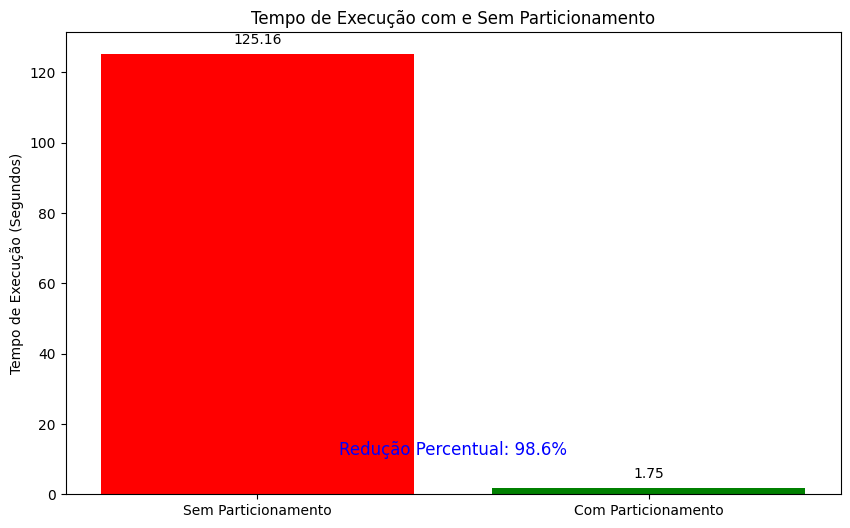

In [ ]:
import matplotlib.pyplot as plt

# Dados
tempos = [125.16, 1.75]  # Tempo sem particionamento e com particionamento
labels = ['Sem Particionamento', 'Com Particionamento']
percentual_melhoria = 98.6

# Plotar os tempos
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(labels, tempos, color=['red', 'green'])
ax.set_ylabel('Tempo de Execução (Segundos)')
ax.set_title('Tempo de Execução com e Sem Particionamento')

# Adicionar valores no gráfico
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 2, round(yval, 2), ha='center', va='bottom')

# Adicionar melhoria percentual como texto
ax.text(0.5, 10, f'Redução Percentual: {percentual_melhoria}%', ha='center', va='bottom', fontsize=12, color='blue')

plt.show()


## **Conclusão**



*  Considerando conjunto de dados menores Pandas foi mais rápido (1.6 segundos) do que PySpark (5.33 segundos);
*   Conforme analise realizada na documentação pyspark  e videos  no Youtube, Pyspark foi projetado para processar grandes volumes de dados distribuídos. No exemplo fornecido, PySpark foi mais lento para o conjunto de dados menor, mas é mais adequado para big data.
* Existe uma ligeira diferença entre o uso de spark.sql e pyspark puro, segundo pesquisas pyspark tem a gerar um tempo menor de processamento, no entanto, a analise trouxe um resultado diferente do esperado.
* O particionamento melhora a performance ao reduzir a quantidade de dados processados em cada operação. Isso é essencial para otimização em big data, conforme demonstrado pela redução do tempo de execução de 125.16 segundos para 1.75 segundos.Isso torna o processamento mais eficiente e rápido.

**Fontes de Dados/Info :**


> https://spark.apache.org/docs/latest/sql-data-sources-parquet.html#partitioning


> "https://www.youtube.com/watch?v=Y2m6S4oIbZ0"


> https://www.youtube.com/watch?v=L0JYz66ne18


> "https://datasets.imdbws.com/title.principals.tsv.gz

> ChatGPT e Gemini







